### Binance Frontrunning Chainlink L2

In [63]:
%cd C:\Dropbox\QUANTstudio\Python\sf_sprint
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import seaborn as sns
import snx_futures_frontrun as snx

C:\Dropbox\QUANTStudio\Python\sf_sprint


In [23]:
# Ingest CSVs
link_l2, binance = snx.getData('dir')

32 csv files ingested.


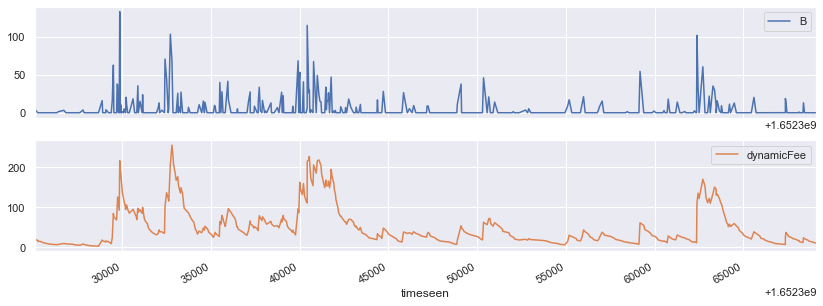

In [64]:
# Precompute Dynamic Fees, SIP-184
eth = snx.getTokenData(link_l2, binance, 'eth')

#### Inspect data
New columns' definitions:    
td_link - update latency in sec    
td_link2 - latency between last binance and link updates in sec    
dPx - chainlink price change in bps    
B - dynamicFee Boost    
dynamicFee - https://sips.synthetix.io/sips/sip-184/    
spread - (px_bnb - px_link) / px_bnb    

In [66]:
eth.head(55).tail(20)

,px_bnb,td_bnb,px_link,td_link,td_link2,epoch,dPx,B,dynamicFee,spread,vol
timeseen,,,,,,,,,,,
2022-04-24 14:41:08,2933.19,2.0,2917.630000,NaN,436.0,1.0,NaN,NaN,0.000000,0.005305,NaN
2022-04-24 14:41:10,2934.70,2.0,2917.630000,NaN,438.0,1.0,NaN,NaN,0.000000,0.005817,NaN
2022-04-24 14:41:18,2936.19,8.0,2917.630000,NaN,446.0,1.0,NaN,NaN,0.000000,0.006321,NaN
2022-04-24 14:41:21,2937.66,3.0,2917.630000,NaN,449.0,1.0,NaN,NaN,0.000000,0.006818,NaN
2022-04-24 14:41:22,NaN,NaN,2931.252243,450.0,0.0,2.0,46.689412,6.689412,6.689412,NaN,NaN
2022-04-24 14:41:23,2939.18,2.0,2931.252243,NaN,1.0,2.0,NaN,NaN,6.689412,0.002697,NaN
2022-04-24 14:41:31,2937.44,8.0,2931.252243,NaN,9.0,2.0,NaN,NaN,6.689412,0.002107,NaN
2022-04-24 14:41:32,2938.93,1.0,2931.252243,NaN,10.0,2.0,NaN,NaN,6.689412,0.002612,NaN
2022-04-24 14:41:34,2940.44,2.0,2931.252243,NaN,12.0,2.0,NaN,NaN,6.689412,0.003125,NaN


In [69]:
# Stats on several columns, spread, etc.
eth[['td_link','spread','dPx','B','dynamicFee']].describe()

,td_link,spread,dPx,B,dynamicFee
count,8893.000000,200100.000000,8893.000000,8894.000000,207565.000000
mean,380.412572,0.001918,25.030572,0.981255,16.795055
std,382.573873,0.005495,11.603852,5.837004,31.930798
min,1.000000,-0.030635,0.003544,0.000000,0.000000
25%,91.000000,-0.000695,20.926714,0.000000,0.224541
50%,239.000000,0.000878,23.290502,0.000000,3.659092
75%,540.000000,0.002912,27.873148,0.000000,18.002450
max,5703.000000,0.075955,189.307319,149.307319,255.092500


In [70]:
# Simulation Parameters
SIZE        = 100000      # USD
THRESHOLD   = 50 / 10000  # spread threshold 
BINANCE_FEE = 10 / 10000  # 10 bps https://www.binance.com/en/fee/trading
KWENTA_FEE  = 25 / 10000  # 25 bps https://docs.kwenta.io/products/exchange-fees
SLIP_FEE    = 0 / 10000   # else if SLIP_FEE == 0, use DynamicFee   

#### Algo Rules    
Arb on every first Binance quote after Chainlink price updates    
Trade executed only when spread above threshold (incl. all fees)    
Fees include Binance, Kwenta, and either Dynamic Fees or Slippage Fees    
Trade Size is constant at 100k    

#### ONE SIM RUN EXAMPLE

In [31]:
df = snx.runSim(eth, SIZE, THRESHOLD, BINANCE_FEE, KWENTA_FEE, SLIP_FEE)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAEF134CC8>],
      dtype=object)

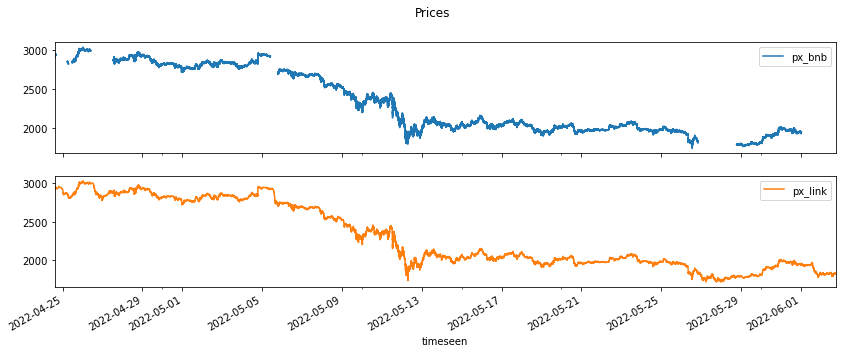

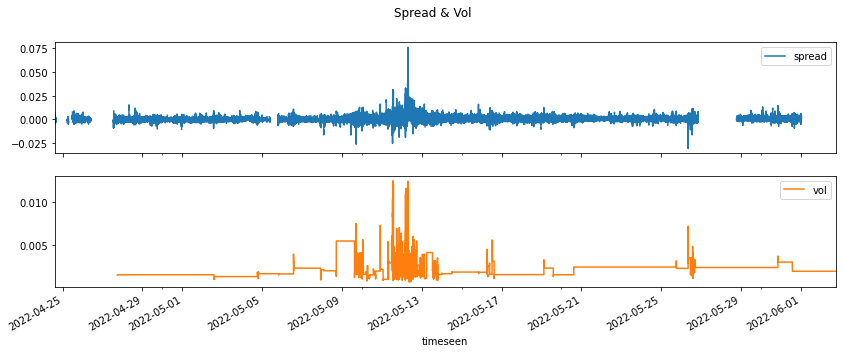

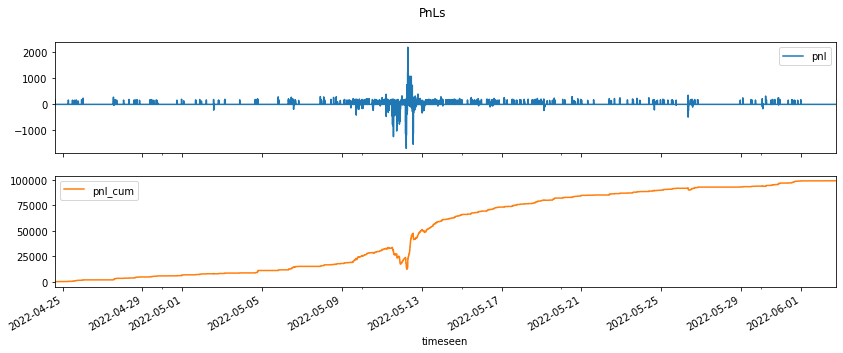

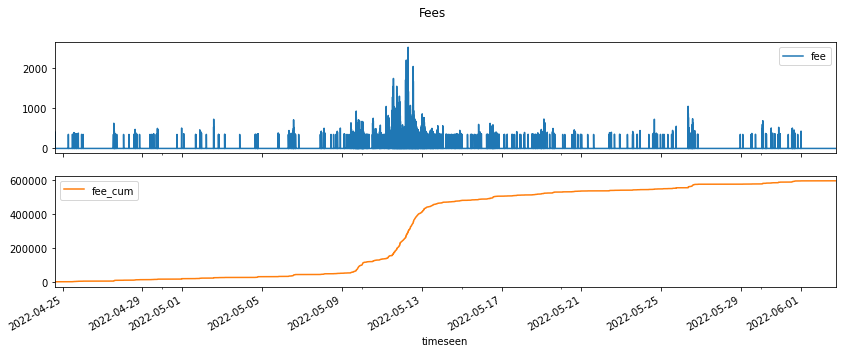

In [32]:
df[['px_bnb','px_link','spread','position']].head(50)
df[['px_bnb','px_link','spread','position','pnl','fee']].head(50)
#df['pnl_cum'] = eth.pnl.cumsum()
df[['px_bnb','px_link']].plot(subplots=True, layout=(2,1), logy=False, figsize=(14,5), title='Prices')
df[['spread','vol']].plot(subplots=True, layout=(2,1), logy=False, figsize=(14,5), title='Spread & Vol')
df[['pnl','pnl_cum']].plot(subplots=True, layout=(2,1), logy=False, figsize=(14,5), title='PnLs')
df[['fee','fee_cum']].plot(subplots=True, layout=(2,1), logy=False, figsize=(14,5), title='Fees')

In [73]:
df[['px_bnb','px_link','spread','vol','position','pnl','pnl_cum','fee','dynamicFee','fee_cum']].head(500).tail(20)

,px_bnb,px_link,spread,vol,position,pnl,pnl_cum,fee,dynamicFee,fee_cum
timeseen,,,,,,,,,,
2022-04-25 11:44:22,2844.60,2835.573889,0.003173,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:44:29,2846.06,2835.573889,0.003684,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:44:50,2847.49,2835.573889,0.004185,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:45:19,2845.86,2835.573889,0.003614,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:45:44,2844.40,2835.573889,0.003103,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:45:59,2845.87,2835.573889,0.003618,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:46:06,2847.36,2835.573889,0.004139,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:47:49,2848.80,2835.573889,0.004643,NaN,NaN,0.000000,8.190488,0.000000,0.544451,2069.026959
2022-04-25 11:47:59,2850.31,2835.573889,0.005170,NaN,35.083903,11.555769,19.746256,505.444509,0.544451,2574.471468


In [72]:
# Five Simulation paths/runs at various Kwenta Fees
runs, fees = snx.runKwentaFees(eth)
# k, KWENTA_FEE, pnl_cum

0 20.0 158124
1 25.0 98824
2 30.0 39524
3 35.0 -19775
4 40.0 -79075


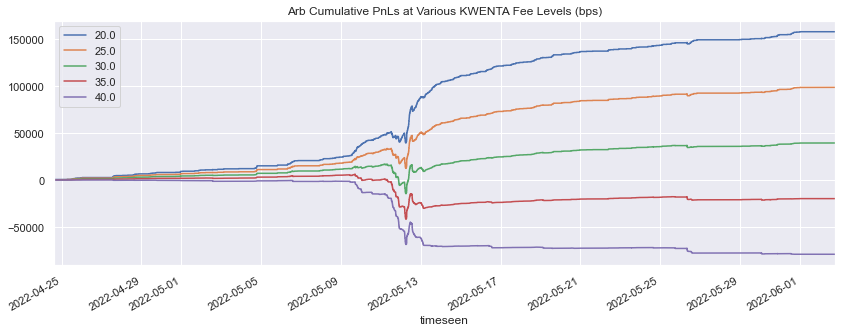

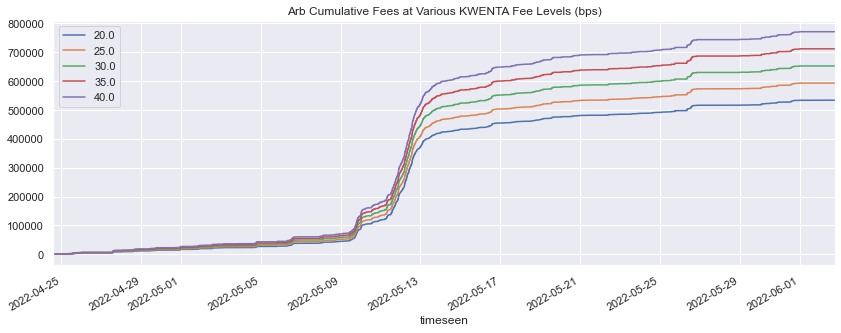

In [75]:
# Charts show Arb PnL and Fees curves for a range of KWENTA Fees
runs.plot(figsize=(14,5), title='Arb Cumulative PnLs at Various KWENTA Fee Levels (bps)');
fees.plot(figsize=(14,5), title='Arb Cumulative Fees at Various KWENTA Fee Levels (bps)');

In [40]:
# Simulation runs for a set of Kwenta Fees and Slippage Fees 
grid = snx.runGrid(eth)
# k, KWENTA_FEE, s, SLIP_FEE, pnl_cum

0 0.001 0 0.0 276724
0 0.001 1 0.002 217531
0 0.001 2 0.004 -19668
0 0.001 3 0.006 -256868
0 0.001 4 0.008 -494068
0 0.001 5 0.01 -731268
1 0.0015 0 0.0 217424
1 0.0015 1 0.002 158231
1 0.0015 2 0.004 -78968
1 0.0015 3 0.006 -316168
1 0.0015 4 0.008 -553368
1 0.0015 5 0.01 -790568
2 0.002 0 0.0 158124
2 0.002 1 0.002 98931
2 0.002 2 0.004 -138268
2 0.002 3 0.006 -375468
2 0.002 4 0.008 -612668
2 0.002 5 0.01 -849868
3 0.0025 0 0.0 98824
3 0.0025 1 0.002 39631
3 0.0025 2 0.004 -197568
3 0.0025 3 0.006 -434768
3 0.0025 4 0.008 -671968
3 0.0025 5 0.01 -909168
4 0.003 0 0.0 39524
4 0.003 1 0.002 -19668
4 0.003 2 0.004 -256868
4 0.003 3 0.006 -494068
4 0.003 4 0.008 -731268
4 0.003 5 0.01 -968468
5 0.0035 0 0.0 -19775
5 0.0035 1 0.002 -78968
5 0.0035 2 0.004 -316168
5 0.0035 3 0.006 -553368
5 0.0035 4 0.008 -790568
5 0.0035 5 0.01 -1027768
6 0.004 0 0.0 -79075
6 0.004 1 0.002 -138268
6 0.004 2 0.004 -375468
6 0.004 3 0.006 -612668
6 0.004 4 0.008 -849868
6 0.004 5 0.01 -1087068


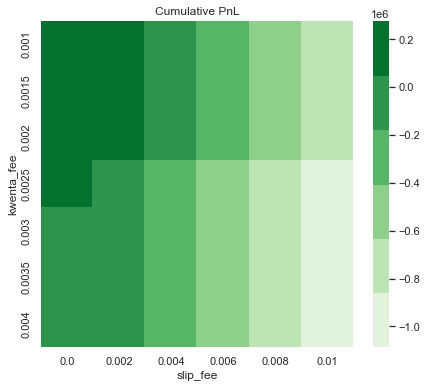

In [61]:
df2 = grid.pivot_table('pnl_cum', 'kwenta_fee', 'slip_fee', fill_value=0)
df2.style.background_gradient(cmap='Greens')
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(df2, cmap=sns.color_palette("Greens")).set(title='Cumulative PnL');

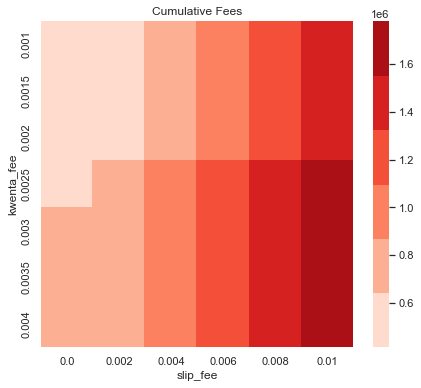

In [62]:
df2 = grid.pivot_table('fee_cum', 'kwenta_fee', 'slip_fee', fill_value=0)
df2.style.background_gradient(cmap='Reds')
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(df2, cmap=sns.color_palette("Reds")).set(title='Cumulative Fees');

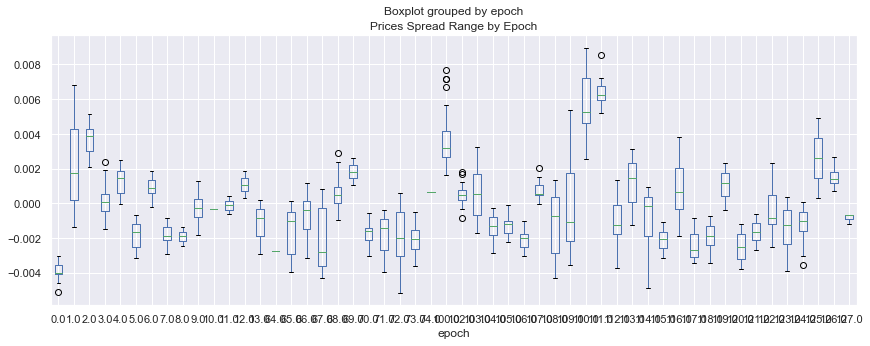

In [80]:
# There is a large variance in spreads within each epoch. See ToDo #1 below.
eth[['spread','epoch']].head(1000).dropna(subset=['spread']).boxplot(column='spread', by='epoch', figsize=(14,5)).set(title="Prices Spread Range by Epoch");

#### ToDo List - let me know if this is interesting to pursue and worth the time exploring further    
1/ Is the "First Binance quote "optimal or the most risk to DebtPool? Introduce a delay from Link price update to Binance trade and show/compare results. In other words, First vs. some later update within Epochs. I could also cherry pick to show the unlikely but still possible maximum Arb PnL within each epoch.       
2/ Redo Vol calculation and integrate/apply Volatility as a mult factor to Slippage Fee, making it dynamic vs. constant. This might be repetitive    
3/ KALEB, please elaborate on you prior comment or give an example on "volume should adjust when taking new long/short position to achieve a certain min threshold, when computing abs(spread)"   